# Anomaly Detection with Isolation Forest

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from time import time
from datetime import datetime, timedelta

#### Import Data from data files and clean

In [185]:
df = pd.read_excel('EsaveExport.xls', parse_dates=['Unnamed: 0'], decimal=',', sheet_name='Export_0')

df.rename(columns={df.columns[0]: "datetime"}, inplace=True)

df.set_index('datetime', inplace=True)

In [186]:
df

,707057500068119547,707057500068755066,ESAVE_193681-980396002_EAN,707057500068789658,707057500068425556,707057500068402960,707057500068104048,707057500068744237,ESAVE_942110464_2_ID,707057500068750269,...,ESAVE_282798-980396002_EAN,707057500068742943,ESAVE_182900-980396002_EAN,707057500068702657,707057500068298990,707057500068614882,707057500068762040,707057500068392667,ESAVE_66267-980396002_EAN,707057500068415243
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,9.4,7.2,8.0,7.1,4.0,6.7,9.9,14.6,NaN,4.7,...,NaN,2.6,13.0,8.0,7.0,6.9,5.4,1.6,8.0,4.6
2015-01-01 01:00:00,9.6,7.2,9.0,7.0,7.0,8.6,10.0,14.6,NaN,2.9,...,NaN,2.8,12.0,6.5,8.0,7.8,5.0,1.8,9.0,4.7
2015-01-01 02:00:00,8.7,7.2,9.0,6.2,6.0,10.4,8.8,15.0,NaN,3.2,...,NaN,2.6,14.0,7.7,7.2,8.8,5.4,2.0,8.0,4.6
2015-01-01 03:00:00,8.8,7.2,9.0,7.8,5.0,10.2,10.2,16.6,NaN,5.3,...,NaN,2.8,12.0,6.7,7.2,9.4,4.6,1.9,7.0,5.0
2015-01-01 04:00:00,9.1,7.2,9.0,7.0,5.0,9.8,9.9,15.4,NaN,18.2,...,NaN,2.6,13.0,5.6,7.4,20.8,15.2,1.9,8.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 19:00:00,6.0,3.0,7.0,3.0,7.0,7.0,10.0,16.0,NaN,2.0,...,10.0,5.0,10.0,6.0,6.0,7.0,17.0,2.0,8.0,4.0
2020-01-01 20:00:00,7.0,2.0,6.0,6.0,6.0,7.0,11.0,15.0,NaN,3.0,...,9.0,5.0,11.0,8.0,4.0,8.0,16.0,1.0,8.0,5.0
2020-01-01 21:00:00,6.0,3.0,6.0,4.0,7.0,10.0,11.0,16.0,NaN,2.0,...,9.0,6.0,10.0,8.0,4.0,8.0,9.0,2.0,9.0,4.0


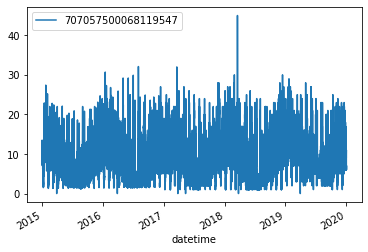

In [187]:
df.plot(y='707057500068119547')
plt.show()

#### Model Training - [IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

In [217]:
training_start = datetime(2016, 10, 1)
training_end = datetime(2016, 11, 4)
test_start = training_end + timedelta(hours=1)
test_end = datetime(2019, 11, 12)

t_data = df[df.columns[0:1]].copy()
t_data.sort_index(inplace = True)
t_data.index = pd.DatetimeIndex(t_data.index).to_period('H')

training_data = t_data[training_start:training_end].copy()
test_data = t_data[test_start:test_end].copy()

training_data, test_data

(                  707057500068119547
 datetime                            
 2016-10-01 00:00                16.2
 2016-10-01 01:00                16.0
 2016-10-01 02:00                15.6
 2016-10-01 03:00                16.1
 2016-10-01 04:00                15.5
 ...                              ...
 2016-11-03 20:00                 8.5
 2016-11-03 21:00                 9.0
 2016-11-03 22:00                 9.6
 2016-11-03 23:00                 8.0
 2016-11-04 00:00                 5.3
 
 [818 rows x 1 columns],
                   707057500068119547
 datetime                            
 2016-11-04 01:00                 6.6
 2016-11-04 02:00                 6.0
 2016-11-04 03:00                 6.0
 2016-11-04 04:00                 8.8
 2016-11-04 05:00                 9.0
 ...                              ...
 2019-11-11 20:00                10.0
 2019-11-11 21:00                10.0
 2019-11-11 22:00                11.0
 2019-11-11 23:00                12.0
 2019-11-12 00:00      

In [249]:
clf = IsolationForest(contamination=0.15, n_estimators=1000)

In [250]:
# training_data.reshape(-1,1)
%time
fitted = clf.fit(training_data.to_numpy())

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


#### prediction

In [251]:
predictions = fitted.predict(test_data.to_numpy())
%time

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


In [298]:
test_data['iforests'] = pd.DataFrame(predictions[0])
# test_data['iforests'] = df['iforests'].map({1: 0, -1: 1})
test_data['iforests'].value_counts()

ValueError: DataFrame constructor not properly called!

In [302]:
pd.DataFrame(predictions).loc(1)

In [253]:
(predictions<0).mean()

0.22208371109096403

In [272]:
test_data.values[:,0]

6.0

In [291]:
abn = np.where(predictions < 0)
print(abn[0])
norm = np.where(predictions >= 0)[0]

print(test_data[0].shape, len(abn), abn.shape)
plt.scatter(range(len(abn)), test_data.values[:,0][abn], edgecolors="r")
plt.scatter(range(len(norm)), test_data.values[:,0][norm], edgecolors="g")

[    7     8    23 ... 26461 26462 26463]


KeyError: 0

In [243]:
#abn = np.where(predictions < 0)
#plt.scatter(x[:,0], x[:,1])
#plt.scatter(x[abn,0], x[abn,1], edgecolors='r')